# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This analysis explores the TMDb (The Movie Database) movie dataset, which contains comprehensive information about 10,000 movies. The dataset provides a rich collection of attributes including financial performance, audience reception, production details, and content characteristics. This data enables investigation into what factors are associated with a movie's commercial success and critical reception.

The dataset is particularly valuable because it includes inflation-adjusted financial figures (budget_adj and revenue_adj), allowing for meaningful comparisons across different time periods.

### Dataset Description 

The dataset contains 21 columns with the following attributes:

#### Identifiers
- `id`: Unique TMDb movie identifier
- `imdb_id`: IMDb identifier for cross-referencing
- `original_title`: The official title of the movie

#### Financial Metrics
- `budget`: Production budget in original currency
- `revenue`: Total box office revenue in original currency
- `budget_adj`: Production budget adjusted to 2010 dollars (accounting for inflation)
- `revenue_adj`: Revenue adjusted to 2010 dollars (accounting for inflation)

#### Audience & Critical Reception
- `popularity`: TMDb popularity score
- `vote_count`: Number of user ratings received
- `vote_average`: Average user rating (typically on a 0-10 scale)

#### Content & Production Details
- `cast`: Main actors (pipe-separated values: Actor1|Actor2|Actor3)
- `director`: Director name
- `genres`: Movie genres (pipe-separated values: Genre1|Genre2|Genre3)
- `keywords`: Descriptive keywords (pipe-separated values)
- `overview`: Brief plot description/synopsis
- `tagline`: Marketing tagline
- `production_companies`: Studios/companies involved (pipe-separated values)

#### Technical & Release Information
- `runtime`: Movie duration in minutes
- `release_date`: Original release date
- `release_year`: Year of release
- `homepage`: Official movie website URL

#### Data Characteristics

Several columns contain multiple values separated by pipe (|) characters:
- cast
- genres
- keywords
- production_companies

The financial columns ending with "_adj" (budget_adj and revenue_adj) represent inflation-adjusted values standardized to 2010 dollars, making them more suitable for temporal comparisons than the raw budget and revenue figures.


### Question(s) for Analysis

This analysis will investigate the following primary question:

**What factors are associated with a movie's financial success and audience reception?**

We'll explore:
1. How does budget relate to revenue?
2. Is there a relationship between critical reception (ratings) and commercial success?
3. Do certain genres perform better financially or critically than others?
4. What are the characteristics of the most successful movies?

In [1]:
# Import statements for packages used in analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Magic word for inline visualizations
%matplotlib inline

# Set default figure size for better readability
sb.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

<a id='wrangling'></a>
## Data Wrangling

In this section, we'll load the TMDb movie dataset, examine its structure and quality, and perform necessary cleaning operations to prepare the data for analysis.

### General Properties

In [2]:
# Load dataset
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

# Display first few rows to understand structure
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Check dimensions of dataset
print(f"Shape: {df.shape}")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Shape: (10866, 21)
Rows: 10866
Columns: 21


In [4]:
# Display column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Generate summary statistics for numerical columns
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# We're going to need this later when we clean data and want verification on our progress
def get_columns_missing_values_stats(df):
    """
    Check for missing values in each column and return a dataframe with the statistics
    """
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)

    # Create a new DataFrame for a nice sorted display
    missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_pct})
    return missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
    
display(get_columns_missing_values_stats(df))

,Missing Count,Percentage
homepage,7930,72.98
tagline,2824,25.99
keywords,1493,13.74
production_companies,1030,9.48
cast,76,0.70
director,44,0.40
genres,23,0.21
imdb_id,10,0.09
overview,4,0.04


In [7]:
# Check for duplicate rows
def get_num_duplicate_rows(df):
    return df.duplicated().sum()

duplicate_count = get_num_duplicate_rows(df)

print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print("\nDuplicate row indices:")
    print(df[df.duplicated()].index.tolist())
    
    # Show duplicate rows; by default pandas keeps the first one which is why we get index=2090 as the dupe
    print("")
    print("="*80)
    print("DUPLICATE ROWS")
    print("="*80)
    display(df[df.duplicated(keep=False)])

Number of duplicate rows: 1

Duplicate row indices:
[2090]

DUPLICATE ROWS


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
# Check release year range
print(f"Min Release Year: {df['release_year'].min()}")
print(f"Maz Release Year: {df['release_year'].max()}")

# Are there any years in the range we're missing data for?
years_sorted = df.sort_values(by='release_year').reset_index(drop=True)
years_sorted['release_year_diff'] = years_sorted['release_year'].diff()

gaps = years_sorted[years_sorted['release_year_diff'] > 1]

missing_years = []
for idx, row in gaps.iterrows():
    start_year = int(row['year'] - row['year_diff'] + 1)
    end_year = int(row['year'] - 1)
    missing_years.extend(range(start_year, end_year + 1))
    
print(f"Missing years: {missing_years}")

Min Release Year: 1960
Maz Release Year: 2015
Missing years: []


In [9]:
# We'll use this later on in cleanup for verification
def get_numeric_cols_with_zeros_stats(df):
    """
    Get stats for numeric columns with values == 0
    """
    numeric_cols = df.select_dtypes(include=np.number).columns

    zero_cols = []
    for col in numeric_cols:
        # Each 'col' has 10k+ entries so we want if any of the values == 0
        if (df[col] == 0).any():
            zero_cols.append(col)

    zero_count = (df == 0).sum()
    zero_pct = (zero_count / len(df) * 100).round(2)

    # Create a new DataFrame for a nice sorted display
    zero_df = pd.DataFrame({'Zero Count': zero_count, 'Percentage': zero_pct})
    return zero_df[zero_df['Zero Count'] > 0].sort_values('Zero Count', ascending=False)

# Check numeric columns for value of zero
zero_counts = get_numeric_cols_with_zeros_stats(df)
print("Numeric columns with count of zero values:")
display(zero_counts)

# runtime has 31 value == 0: we can fix or remove them.

# Some budget / revenue and budget_adj / revenue_adj have values == 0
# We see they have the same counts, but are these zero in the same rows or are the counts a coincedence?

def match_money_columns(df, column_name):
    """
    Match related columns regarding values == 0:
    - Do both have a zero value?
    - Does only the 'money' column have a zero value?
    - Does only the 'adj' column have a zero value?
    """
    # Get related columms
    money_col = df[column_name]
    money_adj_col = df[f'{column_name}_adj']

    both_columns_are_zeros = (money_col == 0) & (money_adj_col == 0)
    only_money_zero = (money_col == 0) & (money_adj_col > 0)
    only_money_adj_zero = (money_col > 0) & (money_adj_col == 0)

    print()
    print("="*80, "\n")
    print(f"Both {column_name} cols are zero: {both_columns_are_zeros.sum()}")
    print(f"Only {column_name} is zero: {only_money_zero.sum()}")
    print(f"Only {column_name}_adj is zero: {only_money_adj_zero.sum()}")

    
match_money_columns(df, 'budget')
match_money_columns(df, 'revenue')

# budget and revenue numbers are internally consistent, but we have some rows with revenue numbers but no budget numbers
# This affects our question of how does budget relate to revenue. Will need to remove these rows.
revenue_no_budget = (df['budget'] == 0) & (df['revenue'] > 0)
print(f"\nRows with revenue but no budget numbers: {revenue_no_budget.sum()}")

Numeric columns with count of zero values:


,Zero Count,Percentage
revenue,6016,55.37
revenue_adj,6016,55.37
budget,5696,52.42
budget_adj,5696,52.42
runtime,31,0.29




Both budget cols are zero: 5696
Only budget is zero: 0
Only budget_adj is zero: 0


Both revenue cols are zero: 6016
Only revenue is zero: 0
Only revenue_adj is zero: 0

Rows with revenue but no budget numbers: 995


Min Runtime: 0
Max Runtime: 900
Min Runtime > 0: 2


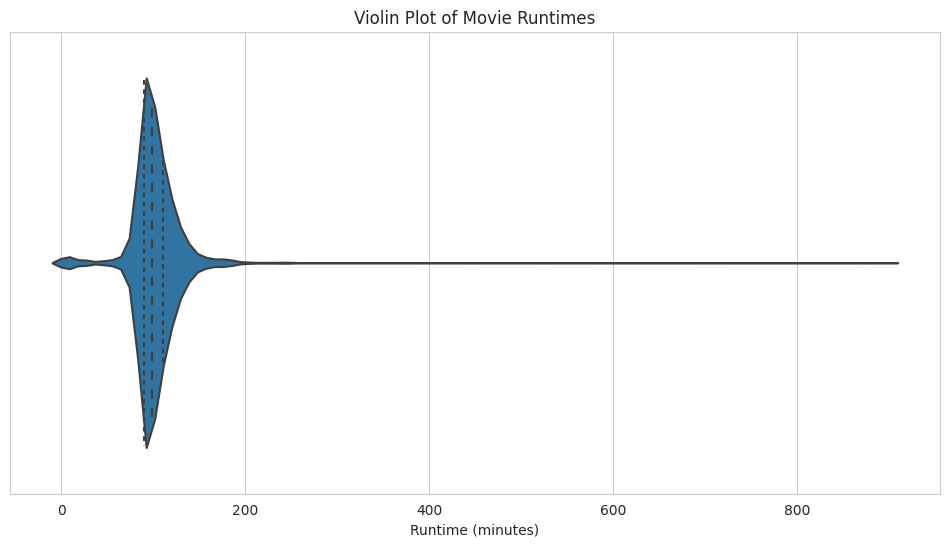


SPOT CHECK SHORT runtime VALUES


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4883,142563,tt2309977,0.078472,0,0,Fresh Guacamole,NaN,NaN,PES,NaN,...,In this follow-up to his stop-motion hit Weste...,2,Animation,NaN,3/2/12,29,7.9,2012,0.0,0.0
4890,126909,tt2219564,0.083202,0,0,Cousin Ben Troop Screening,Jason Schwartzman,http://www.funnyordie.com/videos/fc132ce8b2/co...,Wes Anderson,NaN,...,Cousin Ben hosts a screening of Wes Anderson's...,2,NaN,NaN,1/1/12,14,7.0,2012,0.0,0.0
7905,13924,tt0086855,0.647261,0,0,The Adventures of AndrÃ© and Wally B.,NaN,NaN,Alvy Ray Smith,NaN,...,There's nothing like a restful nap in a pleasa...,2,Animation,Lucasfilm|Pixar Animation Studios,12/17/84,32,5.3,1984,0.0,0.0
10550,13925,tt0091455,0.306425,0,0,Luxo Jr.,NaN,http://www.pixar.com/short_films/Theatrical-Sh...,John Lasseter,NaN,...,A baby lamp finds a ball to play with and it's...,2,Animation|Family,Pixar Animation Studios,8/17/86,81,7.3,1986,0.0,0.0
10754,3171,tt0064064,0.002757,0,0,Bambi Meets Godzilla,NaN,NaN,Marv Newland,NaN,...,"Bambi is nibbling the grass, unaware of the up...",2,Animation|Comedy,NaN,1/1/69,12,5.6,1969,0.0,0.0


In [10]:
# Let's check runtime data
runtime_col = df['runtime']
min_runtime = runtime_col.min()
max_runtime = runtime_col.max()

print(f"Min Runtime: {min_runtime}")
print(f"Max Runtime: {max_runtime}")

# We already knew we had some runtime == 0 values; let's filter those for a minute
print(f"Min Runtime > 0: {df[runtime_col > 0]['runtime'].min()}")

# Pretty low min runtime at 2m; I would expect a movie to be at least 60m
# Let's check the spread
def create_runtime_violin_plot(df):
    sb.violinplot(x=df['runtime'], orient='h', inner='quartile')
    plt.title('Violin Plot of Movie Runtimes')
    plt.xlabel('Runtime (minutes)')
    plt.show()

create_runtime_violin_plot(df)
    
# Let's spot check
print()
print("="*80)
print("SPOT CHECK SHORT runtime VALUES")
print("="*80)
display(df[runtime_col == 2])

# These are likely shorts or trailers - might be why they also have no budget or revenue

### Observations

Based on initial inspection, we've identified the following:

#### Dataset Overview

- 10,866 movies with 21 attributes
- Movies from 1960 to 2015
- 1 duplicate row

#### Data Quality Issues

**1. Zero Values in Key Numeric Columns**
- Some movies have \$0 budget (unrealistic - indicates missing data)
- Some movies have \$0 revenue (could be legitimate failures or missing data)
- Some movies have 0 minutes runtime (definitely an error)

**2. Suspicious Values**
- Maximum runtime of 900 minutes (15 hours) suggests data entry errors

After investigation, runtimes exceeding 240 minutes were found to be mini-series and documentary series rather than theatrical films. Also, very short runtimes were found to be content like short films, which could also explain the $0 budget and revenue columns.

Since our analysis focuses on theatrical movie releases, we'll exclude these different content types to ensure apples-to-apples comparisons. We'll focus on runtimes that fall in the 45 minute to 240 minute range since that's where most runtimes fall according to our exploratory violin plot on the `runtime` column.

**3. Missing Values**
- High missing rates in non-essential columns: `homepage` (72.98%), `keywords` (13.74%), `production_companies` (9.48%), `tagline` (25.99%)
- Low missing rates in important columns: `genres` (23 rows, 0.21%), `cast` (76 rows, 0.7%), `director` (44 rows, 0.4%)
- Critical for analysis: Movies without genre information cannot be properly categorized


### Data Cleaning

Based on the findings, we'll:
1. **Remove rows with missing genres** - genre is essential for our analysis questions
2. **Handle zero values** - remove or flag movies with zero budget, revenue, or runtime for affected analyses
3. **Remove non-critical columns** - columns like homepage, keywords, and tagline are not critical to our research questions
4. **Investigate suspicious runtime values** - examine movies with unusually high runtime
5. **Remove duplicate rows**

These cleaning decisions will be documented and justified in the following section.

In [11]:
# Drop duplicates and create a new dataframe
new_df = df.drop_duplicates()

# Re-check for duplicate rows
print(f"Number of duplicate rows: {get_num_duplicate_rows(new_df)}")

Number of duplicate rows: 0


### Data Cleaning Explanation

We dropped duplicate rows and validated the results. For the validation, we used a previously defined function to ensure we get consistent results.

In [12]:
# Remove non-critical columns
new_df = df.drop(['id', 'imdb_id', 'homepage', 'keywords', 'tagline', 'overview', 'production_companies'], axis=1)
new_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
# Now that we've removed non-critcal columns, let's check our missing values situation
display(get_columns_missing_values_stats(new_df))

,Missing Count,Percentage
cast,76,0.70
director,44,0.40
genres,23,0.21


### Data Cleaning Explanation

We removed columns we don't need to answer our analysis questions. This reduces the overhead of processing and allows us to focus on what's important.

The `cast` and `director` columns were retained in case they're needed to answer the question, "*What are the characteristics of the most successful movies?*"

We can now see there are only a few rows with missing data.

In [14]:
# Remove rows with missing data in columns we need for analysis
new_df = new_df.dropna(subset=['cast', 'director', 'genres'])
display(get_columns_missing_values_stats(new_df))

,Missing Count,Percentage


### Data Cleaning Explanation

We removed rows that were missing data in columns we need for analysis. We had the option of going out and searching for the data, but with so few rows it won't really affect our analysis.

We can now see there are no columns missing data.

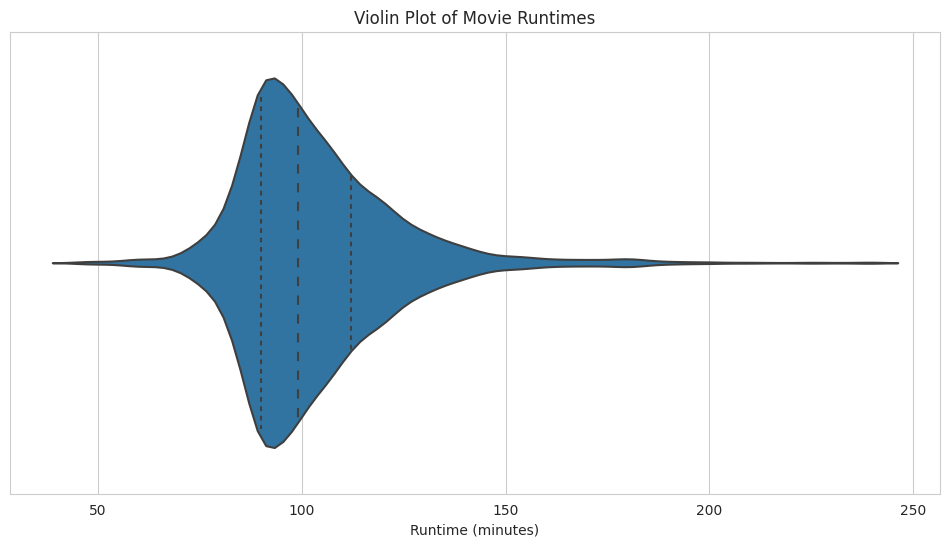

In [15]:
# Remove runtimes less than 45m or greater than 240m
# This has the nice side-effect of removing runtimes == 0
new_df = new_df.query('runtime >= 45 and runtime <= 240')

# Let's check our runtime violin plot now
create_runtime_violin_plot(new_df)

### Data Cleaning Explanation

We removed rows with `runtime` value less than 45 minutes and greater than 240 minutes. This is the time range we chose to represent theatrical release movies based on our initial data wrangling. This removes egregious outliers that may affect our analysis with the side-effect of also removing entries with a runtime of zero minutes.

In [16]:
# Before we move on to cleaning up the budget and revenue columns, let's verify what we have
print(f"Dataframe Rows: {new_df.shape[0]:,}")

# Let's verify budget and revenue breakdown
has_budget = new_df['budget_adj'] > 0
has_revenue = new_df['revenue_adj'] > 0

both = (has_budget & has_revenue).sum()
budget_only = (has_budget & ~has_revenue).sum()
revenue_only = (~has_budget & has_revenue).sum()
neither = (~has_budget & ~has_revenue).sum()

print(f"\nBoth budget and revenue: {both:,}")
print(f"Budget only: {budget_only:,}")
print(f"Revenue only: {revenue_only:,}")
print(f"Neither: {neither:,}")
print("\n-------------------------")
print(f"Calculated Total: {both + budget_only + revenue_only + neither:,}")

Dataframe Rows: 10,466

Both budget and revenue: 3,845
Budget only: 1,276
Revenue only: 990
Neither: 4,355

-------------------------
Calculated Total: 10,466


In [17]:
# OK, now let's clean this up...
# Remove rows with no financial data
df_cleaned = new_df[~((new_df['budget_adj'] == 0) & (new_df['revenue_adj'] == 0))]

print(f"Original dataset: {new_df.shape[0]:,} rows")
print(f"Cleaned dataset: {df_cleaned.shape[0]:,} rows")
print(f"Removed: {new_df.shape[0] - df_cleaned.shape[0]:,} rows with no financial data")

Original dataset: 10,466 rows
Cleaned dataset: 6,111 rows
Removed: 4,355 rows with no financial data


### Data Cleaning Explanation

We removed 4,355 movies (41.6%) that had zero values for both budget_adj and revenue_adj.

These movies have no financial data and cannot contribute to any of our analysis questions.

This leaves us with 6,111 movies:
- 3,845 with complete financial data (for budget vs revenue analysis)
- 2,266 with partial financial data (useful for revenue-based commercial success analysis)

In [18]:
# Let's check out what we have now for revenue and budget
df_cleaned_money = df_cleaned[(df_cleaned['budget_adj'] > 0) & (df_cleaned['revenue_adj'] > 0)]

print(f"Budget Adj min: {df_cleaned_money['budget_adj'].min()}")
print(f"Revenue Adj min: {df_cleaned_money['revenue_adj'].min()}")

def low_money_col_analysis(df, column_name, cutoff):
    low = df[df[column_name] < cutoff].sort_values(column_name)

    print(f"\nMovies with {column_name} < $1M: {low.shape[0]}")
    print(f"Percentage of dataset: {(low.shape[0] / df.shape[0]) * 100:.2f}%")

    # Look at ranges
    print(f"{column_name} ranges:")
    ranges = [
        (0, 1000, "< $1K"),
        (1000, 10000, "$1K - $10K"),
        (10000, 50000, "$10K - $50K"),
        (50000, 100000, "$50K - $100K"),
        (100000, 250000, "$100K - $250K"),
        (250000, 500000, "$250K - $500K"),
        (500000, 1000000, "$500K - $1M")
    ]

    for min_val, max_val, label in ranges:
        count = ((df[column_name] >= min_val) & 
                 (df[column_name] < max_val)).sum()
        print(f"{label:20} : {count:4} movies")

# Get movies with budget_adj < $1M
low_money_col_analysis(df_cleaned_money, 'budget_adj', 10000000)
        
# Get movies with revenue_adj < $1M
low_money_col_analysis(df_cleaned_money, 'revenue_adj', 10000000)
    
# Examine movies in questionable ranges
questionable = df_cleaned_money[df_cleaned_money['budget_adj'] < 50000].sort_values('budget_adj')
print("\nMovies with budget_adj < $50K:")
print(questionable[['original_title', 'release_year', 'budget_adj', 'revenue_adj']].to_string(index=False))

# Remove movies with unrealistically low budgets
MIN_BUDGET_THRESHOLD = 50000

print(f"\n\nBefore budget threshold filter: {df_cleaned_money.shape[0]} movies")

df_cleaned_money = df_cleaned_money[df_cleaned_money['budget_adj'] >= MIN_BUDGET_THRESHOLD]

print(f"After budget threshold filter: {df_cleaned_money.shape[0]} movies")

# Verify minimum budget
print(f"\nNew minimum budget_adj: ${df_cleaned_money['budget_adj'].min():,.2f}")

Budget Adj min: 0.969398042591472
Revenue Adj min: 2.37070528956505

Movies with budget_adj < $1M: 734
Percentage of dataset: 19.09%
budget_adj ranges:
< $1K                :   21 movies
$1K - $10K           :    2 movies
$10K - $50K          :   10 movies
$50K - $100K         :   10 movies
$100K - $250K        :   12 movies
$250K - $500K        :   18 movies
$500K - $1M          :   44 movies

Movies with revenue_adj < $1M: 675
Percentage of dataset: 17.56%
revenue_adj ranges:
< $1K                :   29 movies
$1K - $10K           :   16 movies
$10K - $50K          :   26 movies
$50K - $100K         :   23 movies
$100K - $250K        :   37 movies
$250K - $500K        :   47 movies
$500K - $1M          :   62 movies

Movies with budget_adj < $50K:
                    original_title  release_year   budget_adj  revenue_adj
           Love, Wedding, Marriage          2011     0.969398 1.335831e+03
                      Lost & Found          1999     1.309053 1.309053e+02
               

### Data Cleaning Explanation

**Data Quality Decision:** We did not remove any rows from the data. A decision was made to create filtered datasets to account for unrealistic values.

<a id='eda'></a>
## Exploratory Data Analysis

As a refresher, here are the questions we'll be answering:

1. How does budget relate to revenue?
2. Is there a relationship between critical reception (ratings) and commercial success?
3. Do certain genres perform better financially or critically than others?
4. What are the characteristics of the most successful movies?

### Data Subsets for Analysis

Due to data quality variations, we create specific subsets for different analyses:

**For Question 1 (Budget vs Revenue):**
- Used movies with budget_adj ≥ \\$50,000 AND revenue_adj > 0
- Removed 33 movies with budget < \\$50K due to clear data errors (e.g., major films with wrong units)

**For Questions 2-4 (Commercial Success via Revenue):**
- Used movies with revenue_adj > 0 (budget not required)

This approach maximizes data usage while ensuring quality for each specific analysis.

Let's explore the questions in detail.

**Create re-useable functions**

In [19]:
MIN_BUDGET_THRESHOLD = 50000

def create_histogram(df, x_col, title, xlabel, bins=30, color='steelblue'):
    """
    Create a histogram with consistent formatting
    """
    plt.figure(figsize=(10, 6))
    plt.hist(df[x_col], bins=bins, color=color, edgecolor='black', alpha=0.7)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    
    # Format x-axis to show values in millions
    ax = plt.gca()
    
    # Check if x column name suggests it's monetary (contains 'budget', 'revenue', 'adj')
    if any(keyword in x_col.lower() for keyword in ['budget', 'revenue', 'adj']):
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M'))
    
    plt.show()

def create_scatter_plot(df, x_col, y_col, title, xlabel, ylabel):
    """
    Create a scatter plot with consistent formatting
    
    Parameters:
    df: DataFrame
    x_col: X-axis column name
    y_col: Y-axis column name
    title: Plot title
    xlabel: X-axis label
    ylabel: Y-axis label
    """
    plt.figure(figsize=(12, 8))
    plt.scatter(df[x_col], df[y_col], alpha=0.5, s=30, color='steelblue')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Format axes to show values in millions for monetary columns
    ax = plt.gca()
    
    # Check if x column name suggests it's monetary (contains 'budget', 'revenue', 'adj')
    if any(keyword in x_col.lower() for keyword in ['budget', 'revenue', 'adj']):
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M'))
    
    # Check if y column name suggests it's monetary
    if any(keyword in y_col.lower() for keyword in ['budget', 'revenue', 'adj']):
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, p: f'${y/1e6:.0f}M'))
    
    plt.show()

def print_summary_stats(df, column, label):
    """
    Print formatted summary statistics
    
    Parameters:
    df: DataFrame
    column: Column name to summarize
    label: Descriptive label for the column
    """
    print(f"\n{label} Summary Statistics:")
    print("="*50)
    print(f"Count:  {df[column].count():,.0f}")
    print(f"Mean:   ${df[column].mean():,.2f}")
    print(f"Median: ${df[column].median():,.2f}")
    print(f"Std:    ${df[column].std():,.2f}")
    print(f"Min:    ${df[column].min():,.2f}")
    print(f"25%:    ${df[column].quantile(0.25):,.2f}")
    print(f"75%:    ${df[column].quantile(0.75):,.2f}")
    print(f"Max:    ${df[column].max():,.2f}")

### Question 1: How does budget relate to revenue?

We'll analyze movies that have complete financial data.

**Filter our clean dataset to what we need to answer the first question**

In [20]:
# Filter to movies with complete financial data
df_budget_revenue = df_cleaned[(df_cleaned['budget_adj'] > MIN_BUDGET_THRESHOLD) & (df_cleaned['revenue_adj'] > MIN_BUDGET_THRESHOLD)]

print(f"Movies with complete financial data: {df_budget_revenue.shape[0]}")
print(f"Percentage of cleaned dataset: {(df_budget_revenue.shape[0]/df_cleaned.shape[0])*100:.2f}%")

Movies with complete financial data: 3760
Percentage of cleaned dataset: 61.53%


**1D Analysis - Individual Variables**

First, let's understand the distribution of budgets and revenues independently.

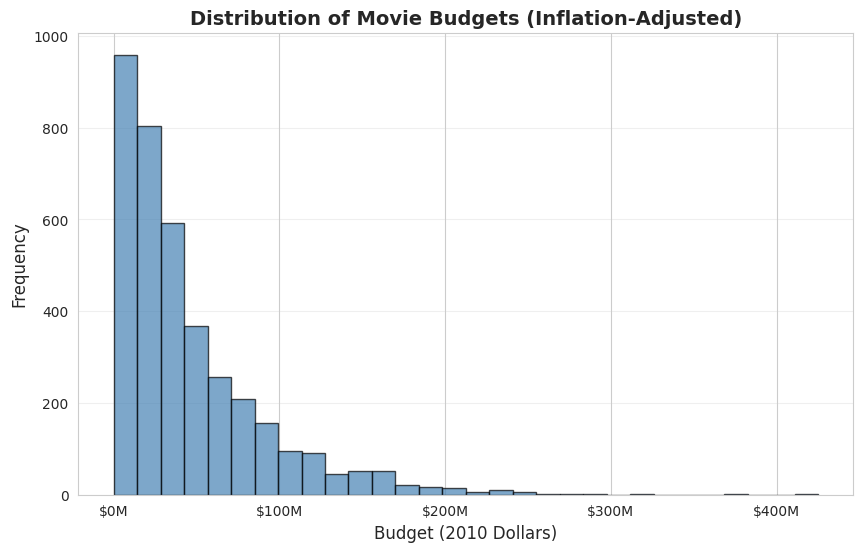


Budget (Adjusted) Summary Statistics:
Count:  3,760
Mean:   $45,106,740.94
Median: $30,736,141.40
Std:    $44,816,201.28
Min:    $52,583.43
25%:    $13,826,231.79
75%:    $61,140,419.96
Max:    $425,000,000.00


In [21]:
# Explore budget_adj distribution
create_histogram(df_budget_revenue, 'budget_adj', 
                'Distribution of Movie Budgets (Inflation-Adjusted)',
                'Budget (2010 Dollars)')

print_summary_stats(df_budget_revenue, 'budget_adj', 'Budget (Adjusted)')

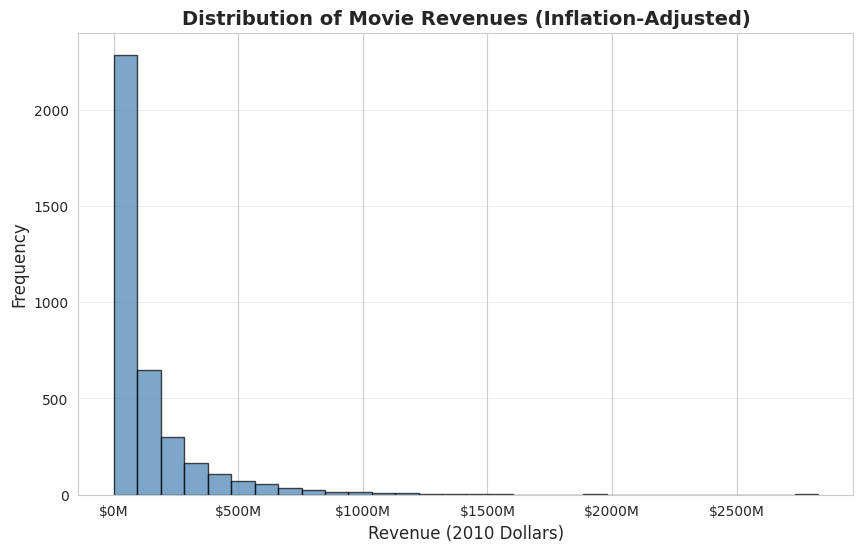


Revenue (Adjusted) Summary Statistics:
Count:  3,760
Mean:   $140,142,529.99
Median: $64,429,808.53
Std:    $217,690,922.67
Min:    $52,604.00
25%:    $20,246,031.20
75%:    $166,514,083.85
Max:    $2,827,123,750.41


In [22]:
# Explore revenue_adj distribution
create_histogram(df_budget_revenue, 'revenue_adj',
                'Distribution of Movie Revenues (Inflation-Adjusted)',
                'Revenue (2010 Dollars)')

print_summary_stats(df_budget_revenue, 'revenue_adj', 'Revenue (Adjusted)')

**2D Analysis - Relationship Between Variables**

Now let's examine how budget relates to revenue.

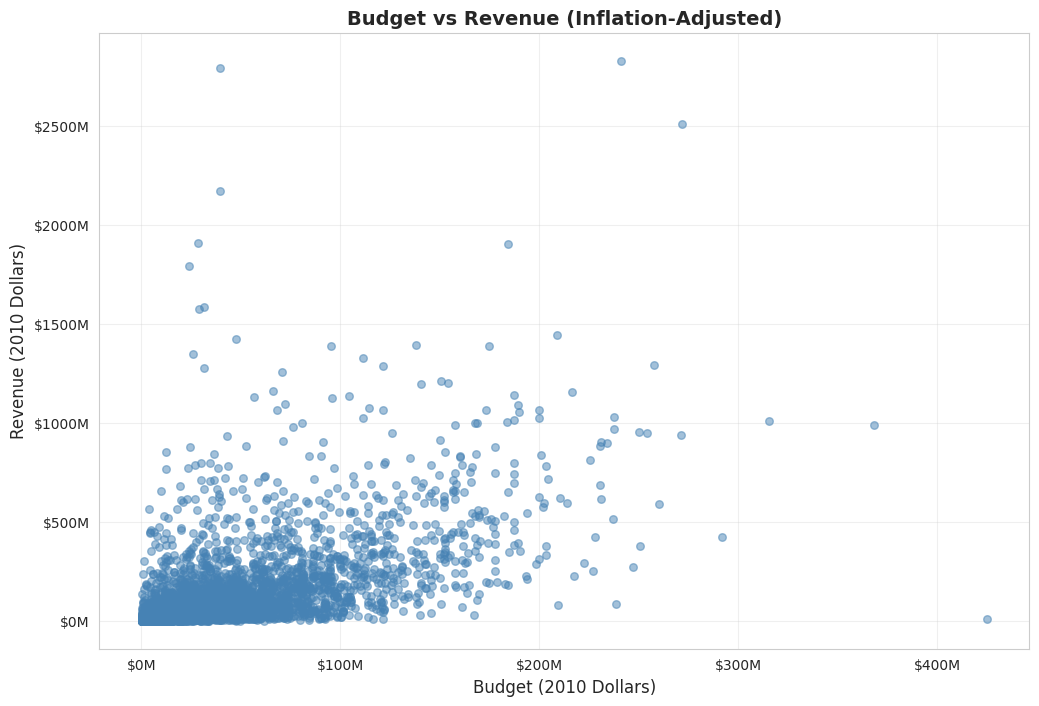


Correlation between budget and revenue: 0.567


In [23]:
# Create scatter plot
create_scatter_plot(df_budget_revenue, 'budget_adj', 'revenue_adj',
                   'Budget vs Revenue (Inflation-Adjusted)',
                   'Budget (2010 Dollars)',
                   'Revenue (2010 Dollars)')

# Calculate correlation
correlation = df_budget_revenue['budget_adj'].corr(df_budget_revenue['revenue_adj'])
print(f"\nCorrelation between budget and revenue: {correlation:.3f}")

### Key Findings

**Individual Variable Distributions:**
- Both budget and revenue are right-skewed, with most movies clustering at lower values and a long tail of expensive blockbusters
- Budget: Median \\$30.4M, Mean \\$44.7M (indicating expensive outliers)
- Revenue: Median \\$64.4M, Mean \\$140M (blockbusters significantly pull the average up)

**Budget-Revenue Relationship:**
- Moderate positive correlation (r = 0.567) indicates higher budgets tend to generate higher revenues
- However, substantial scatter suggests budget alone doesn't guarantee commercial success
- Many movies with similar budgets show wide variation in revenue outcomes
- This indicates other factors (marketing, quality, timing, genre, etc.) play significant roles in financial success

### Question 2: Is there a relationship between critical reception (ratings) and commercial success?

We'll analyze the movies that have revenue data to understand if higher ratings correlate with higher box office performance.

**Filter our clean dataset to what we need to answer the first question**

In [24]:
# Create analysis subset for Question 2
df_q2_commercial = df_cleaned[df_cleaned['revenue_adj'] > MIN_BUDGET_THRESHOLD]

print(f"Q2 Analysis Dataset: {df_q2_commercial.shape[0]} movies")
print(f"Percentage of cleaned dataset: {(df_q2_commercial.shape[0]/df_cleaned.shape[0])*100:.2f}%")

Q2 Analysis Dataset: 4667 movies
Percentage of cleaned dataset: 76.37%


**1D Analysis - Individual Variables**

First, let's examine the distribution of movie ratings and revenues independently.

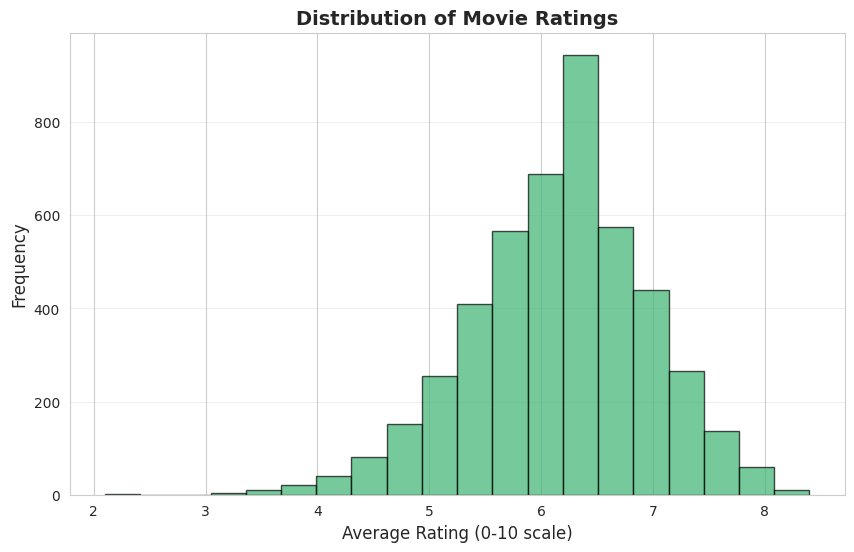


Vote Average Summary Statistics:
Count:  4,667
Mean:   $6.16
Median: $6.20
Std:    $0.79
Min:    $2.10
25%:    $5.70
75%:    $6.70
Max:    $8.40


In [25]:
# Explore vote_average distribution
create_histogram(df_q2_commercial, 'vote_average',
                'Distribution of Movie Ratings',
                'Average Rating (0-10 scale)',
                bins=20, color='mediumseagreen')

print_summary_stats(df_q2_commercial, 'vote_average', 'Vote Average')

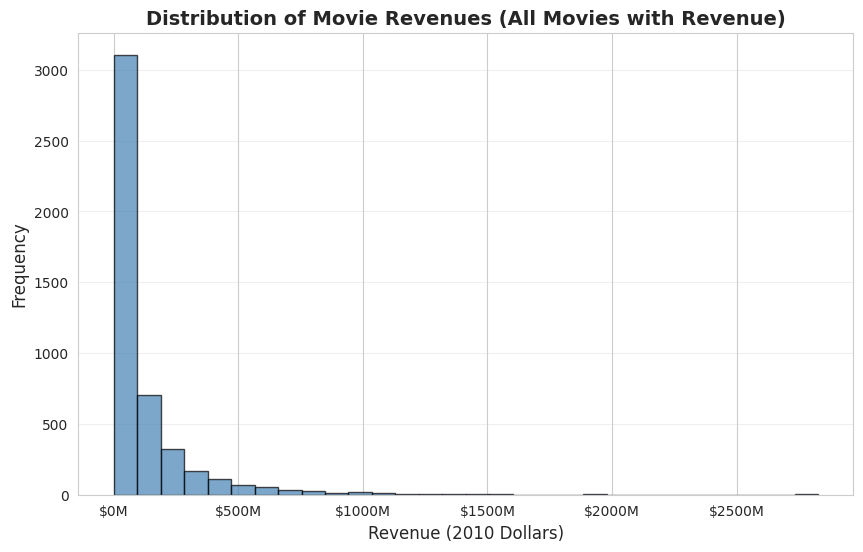


Revenue (Adjusted) Summary Statistics:
Count:  4,667
Mean:   $119,416,760.08
Median: $47,834,228.78
Std:    $201,359,917.88
Min:    $50,581.72
25%:    $13,144,973.12
75%:    $137,319,002.98
Max:    $2,827,123,750.41


In [26]:
# Explore revenue for this dataset
create_histogram(df_q2_commercial, 'revenue_adj',
                'Distribution of Movie Revenues (All Movies with Revenue)',
                'Revenue (2010 Dollars)')

print_summary_stats(df_q2_commercial, 'revenue_adj', 'Revenue (Adjusted)')

**2D Analysis - Relationship Between Variables**

Now let's examine how vote_average relates to revenue.

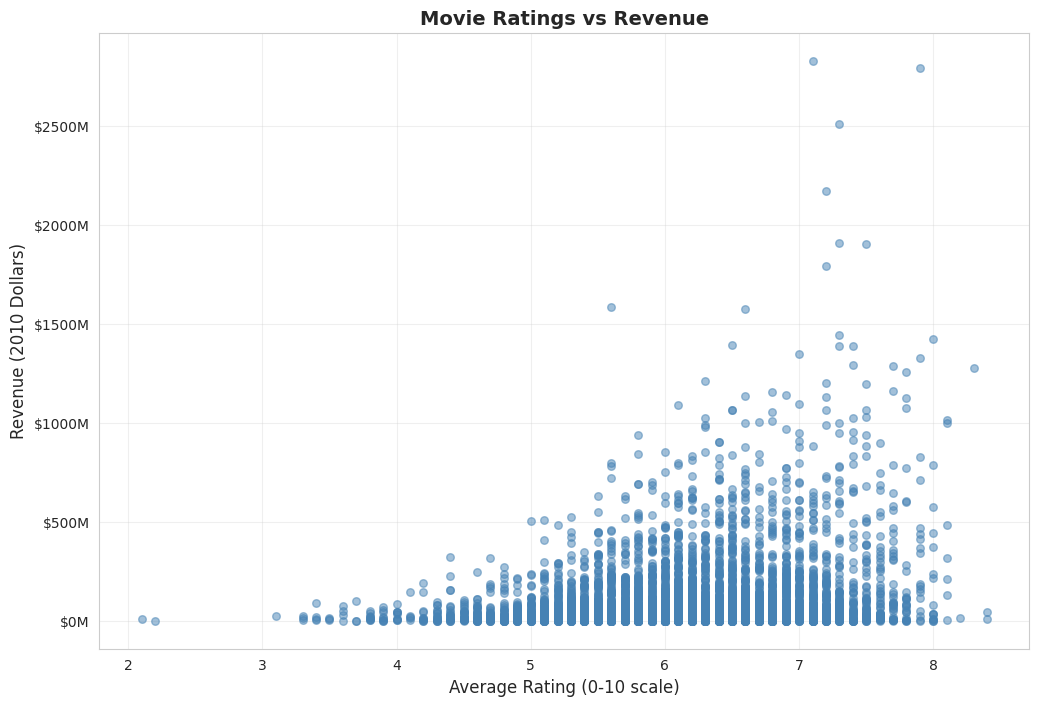


Correlation between ratings and revenue: 0.240


In [27]:
# Create scatter plot: ratings vs revenue
create_scatter_plot(df_q2_commercial, 'vote_average', 'revenue_adj',
                   'Movie Ratings vs Revenue',
                   'Average Rating (0-10 scale)',
                   'Revenue (2010 Dollars)')

# Calculate correlation
correlation = df_q2_commercial['vote_average'].corr(df_q2_commercial['revenue_adj'])
print(f"\nCorrelation between ratings and revenue: {correlation:.3f}")

<Figure size 1200x600 with 0 Axes>

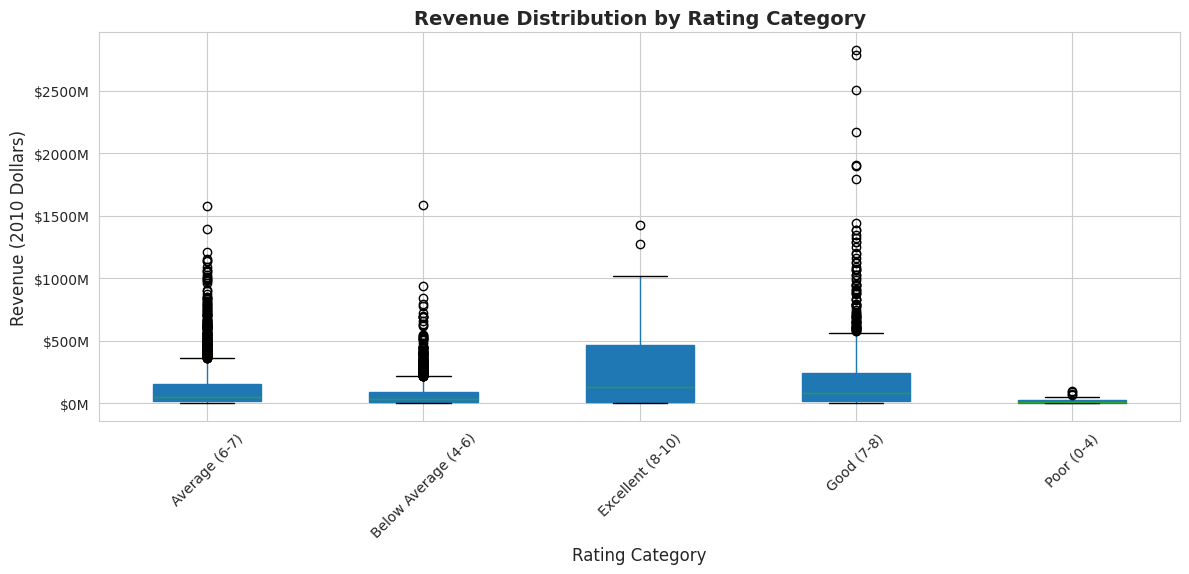


Mean Revenue by Rating Category:
rating_category
Excellent (8-10)       3.238823e+08
Good (7-8)             2.110821e+08
Average (6-7)          1.217068e+08
Below Average (4-6)    7.717222e+07
Poor (0-4)             2.265385e+07
Name: revenue_adj, dtype: float64


In [28]:
# Create rating categories for box plot
def categorize_rating(rating):
    """Categorize ratings into groups"""
    if rating < 4:
        return 'Poor (0-4)'
    elif rating < 6:
        return 'Below Average (4-6)'
    elif rating < 7:
        return 'Average (6-7)'
    elif rating < 8:
        return 'Good (7-8)'
    else:
        return 'Excellent (8-10)'

pd.options.mode.copy_on_write = True
df_q2_commercial['rating_category'] = df_q2_commercial['vote_average'].apply(categorize_rating)

# Create box plot
plt.figure(figsize=(12, 6))
df_q2_commercial.boxplot(column='revenue_adj', by='rating_category', figsize=(12, 6), patch_artist=True)
plt.title('Revenue Distribution by Rating Category', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title
plt.xlabel('Rating Category', fontsize=12)
plt.ylabel('Revenue (2010 Dollars)', fontsize=12)
plt.xticks(rotation=45)
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M'))
plt.tight_layout()
plt.show()

# Show mean revenue by category
print("\nMean Revenue by Rating Category:")
print(df_q2_commercial.groupby('rating_category')['revenue_adj'].mean().sort_values(ascending=False))

### Key Findings

**Individual Variable Distributions:**
- Movie ratings follow a roughly normal distribution centered around 6.0-6.2 (median 6.20, mean 6.16)
- Most movies receive ratings between 5.7 and 6.7 (25th to 75th percentile)
- Very few movies receive extremely low (<3) or extremely high (>8) ratings
- Revenue distribution remains highly right-skewed, similar to Q1 findings

**Ratings-Revenue Relationship:**
- Weak positive correlation (r = 0.240) indicates ratings have limited impact on commercial success
- This correlation is much weaker than the budget-revenue relationship (r = 0.567)
- The scatter plot reveals massive revenue variation at every rating level
- Movies rated 6-8 can earn anywhere from under \\$1M to over \\$2.5B

**Key Insight:** Critical reception appears to be a poor predictor of box office performance. Highly-rated movies don't necessarily earn more revenue, and some lower-rated movies achieve significant commercial success. This suggests that factors beyond critical acclaim (such as marketing, star power, genre appeal, and release timing) play much larger roles in determining commercial success.

### Question 3: Do certain genres perform better financially or critically than others?

We'll analyze genre patterns across movies with revenue data. Note that many movies span multiple genres (e.g., "Action|Adventure|Sci-Fi"), so we'll analyze each genre separately. This means a single movie contributes to the analysis of each of its genres.

In [29]:
# Create analysis subset for Question 3
# We want movies with revenue data for commercial analysis
df_q3_genres = df_cleaned[df_cleaned['revenue_adj'] > MIN_BUDGET_THRESHOLD].copy()

print(f"Q3 Analysis Dataset: {df_q3_genres.shape[0]:,} movies")

# Let's first look at the genres column structure
print("\nSample genres:")
print(df_q3_genres['genres'].head(10))

# Split pipe-separated genres and explode into separate rows
# This means a movie with "Action|Adventure|Sci-Fi" becomes 3 rows
df_genres_exploded = df_q3_genres.copy()
df_genres_exploded['genres'] = df_genres_exploded['genres'].str.split('|')
df_genres_exploded = df_genres_exploded.explode('genres')

print(f"\nExploded dataset: {df_genres_exploded.shape[0]:,} genre entries")
print(f"Average genres per movie: {df_genres_exploded.shape[0] / df_q3_genres.shape[0]:.2f}")

# Clean up any whitespace
df_genres_exploded['genres'] = df_genres_exploded['genres'].str.strip()

Q3 Analysis Dataset: 4,667 movies

Sample genres:
0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
5             Western|Drama|Adventure|Thriller
6    Science Fiction|Action|Thriller|Adventure
7              Drama|Adventure|Science Fiction
8            Family|Animation|Adventure|Comedy
9                      Comedy|Animation|Family
Name: genres, dtype: object

Exploded dataset: 12,249 genre entries
Average genres per movie: 2.62


**1D Analysis - Genre Frequency**

First, let's see which genres are most common in our dataset.

Genre Frequency:
Drama              2191
Comedy             1712
Thriller           1372
Action             1230
Romance             842
Adventure           833
Crime               754
Science Fiction     572
Horror              526
Family              502
Fantasy             448
Mystery             400
Animation           233
Music               174
History             147
War                 133
Documentary          86
Western              64
Foreign              29
TV Movie              1
Name: genres, dtype: int64


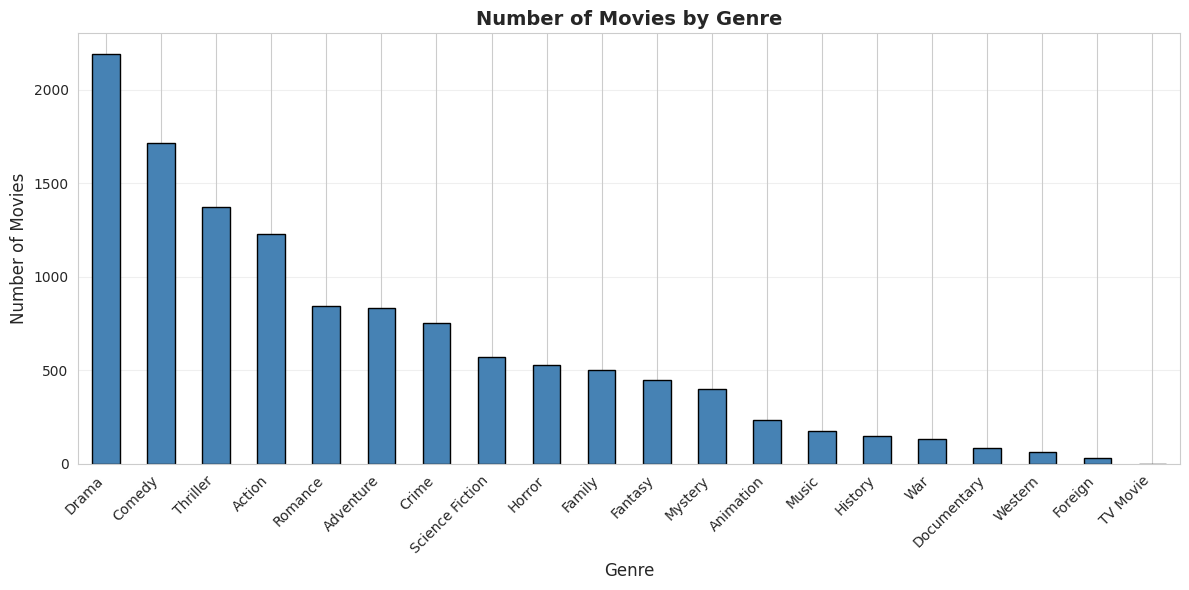

In [30]:
# Count movies per genre
genre_counts = df_genres_exploded['genres'].value_counts()

print("Genre Frequency:")
print(genre_counts)

# Create bar chart
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Number of Movies by Genre', fontsize=14, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**2D Analysis - Relationship Between Variables**

Now let's examine how revenue and ratings relate to genre.


Mean Revenue by Genre:
                         mean        median  count
genres                                            
Animation        2.555711e+08  1.532750e+08    233
Adventure        2.500624e+08  1.175923e+08    833
Fantasy          2.274338e+08  1.051833e+08    448
Family           2.150555e+08  1.070487e+08    502
Science Fiction  1.868832e+08  7.330203e+07    572
Action           1.777223e+08  8.044073e+07   1230
War              1.406357e+08  7.283737e+07    133
Western          1.188547e+08  4.465593e+07     64
Thriller         1.171400e+08  4.921709e+07   1372
Music            1.093933e+08  4.130209e+07    174
Comedy           1.061107e+08  4.985552e+07   1712
History          1.058843e+08  6.482731e+07    147
Mystery          1.030506e+08  4.445691e+07    400
Crime            1.017048e+08  5.085165e+07    754
Romance          9.750124e+07  4.003384e+07    842
Drama            8.752590e+07  3.409539e+07   2191
Horror           7.494869e+07  3.605746e+07    526
TV Movi

<Figure size 1400x800 with 0 Axes>

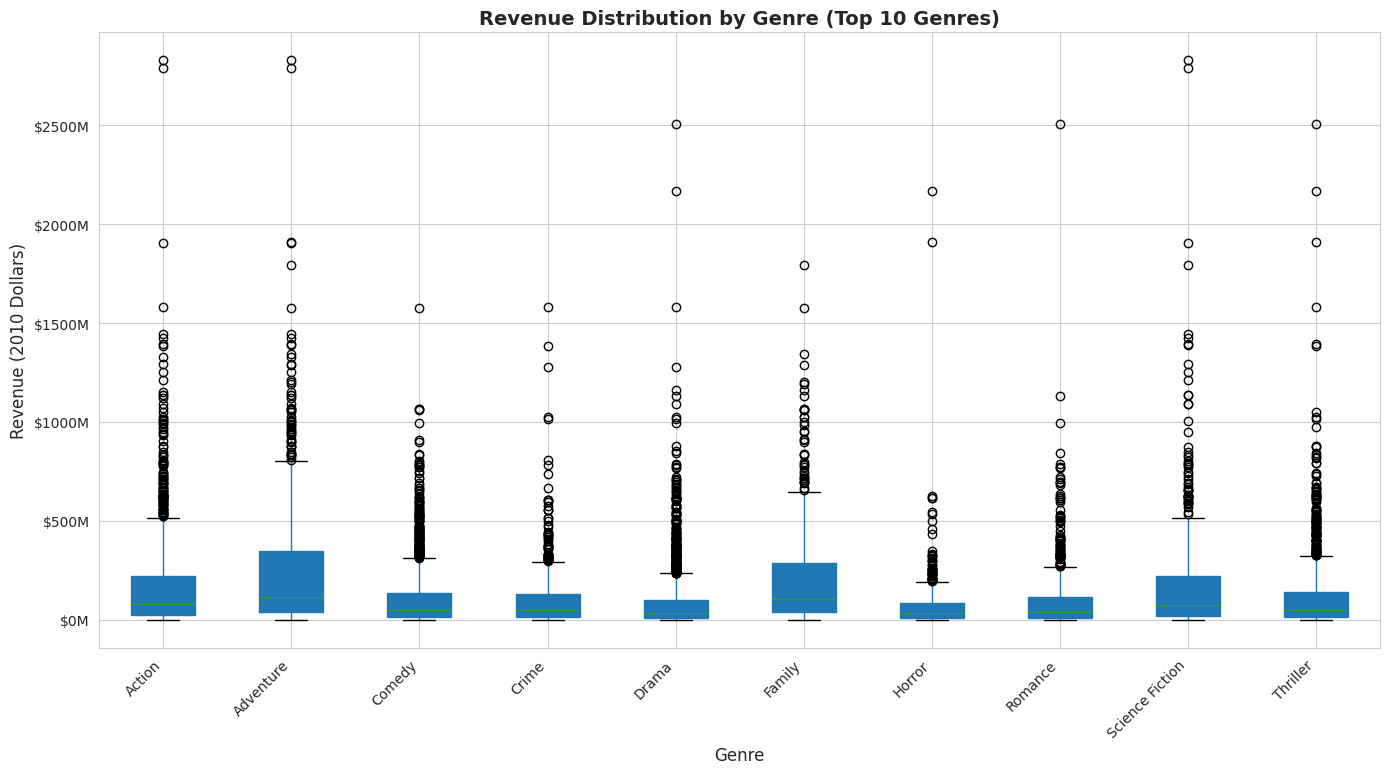

In [31]:
# Calculate statistics by genre
print("\nMean Revenue by Genre:")
genre_revenue_stats = df_genres_exploded.groupby('genres')['revenue_adj'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
print(genre_revenue_stats)

# Create box plot for top genres (those with enough samples)
top_genres = genre_counts.head(10).index

df_top_genres = df_genres_exploded[df_genres_exploded['genres'].isin(top_genres)]

plt.figure(figsize=(14, 8))
df_top_genres.boxplot(column='revenue_adj', by='genres', figsize=(14, 8), patch_artist=True)
plt.title('Revenue Distribution by Genre (Top 10 Genres)', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Revenue (2010 Dollars)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Format y-axis as millions
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, p: f'${y/1e6:.0f}M'))

plt.tight_layout()
plt.show()


Mean Rating by Genre:
                     mean  median  count
genres                                  
Documentary      6.920930     7.0     86
History          6.560544     6.6    147
War              6.554887     6.6    133
Western          6.410938     6.3     64
Drama            6.370561     6.4   2191
Music            6.349425     6.4    174
Animation        6.349356     6.4    233
Crime            6.275199     6.2    754
Mystery          6.185750     6.2    400
Foreign          6.175862     6.3     29
Romance          6.170546     6.2    842
Adventure        6.116567     6.1    833
Family           6.107371     6.1    502
Thriller         6.066910     6.1   1372
Fantasy          6.030134     6.1    448
Action           6.014228     6.1   1230
Comedy           6.013026     6.0   1712
Science Fiction  6.001573     6.0    572
Horror           5.706844     5.8    526
TV Movie         5.600000     5.6      1


<Figure size 1400x800 with 0 Axes>

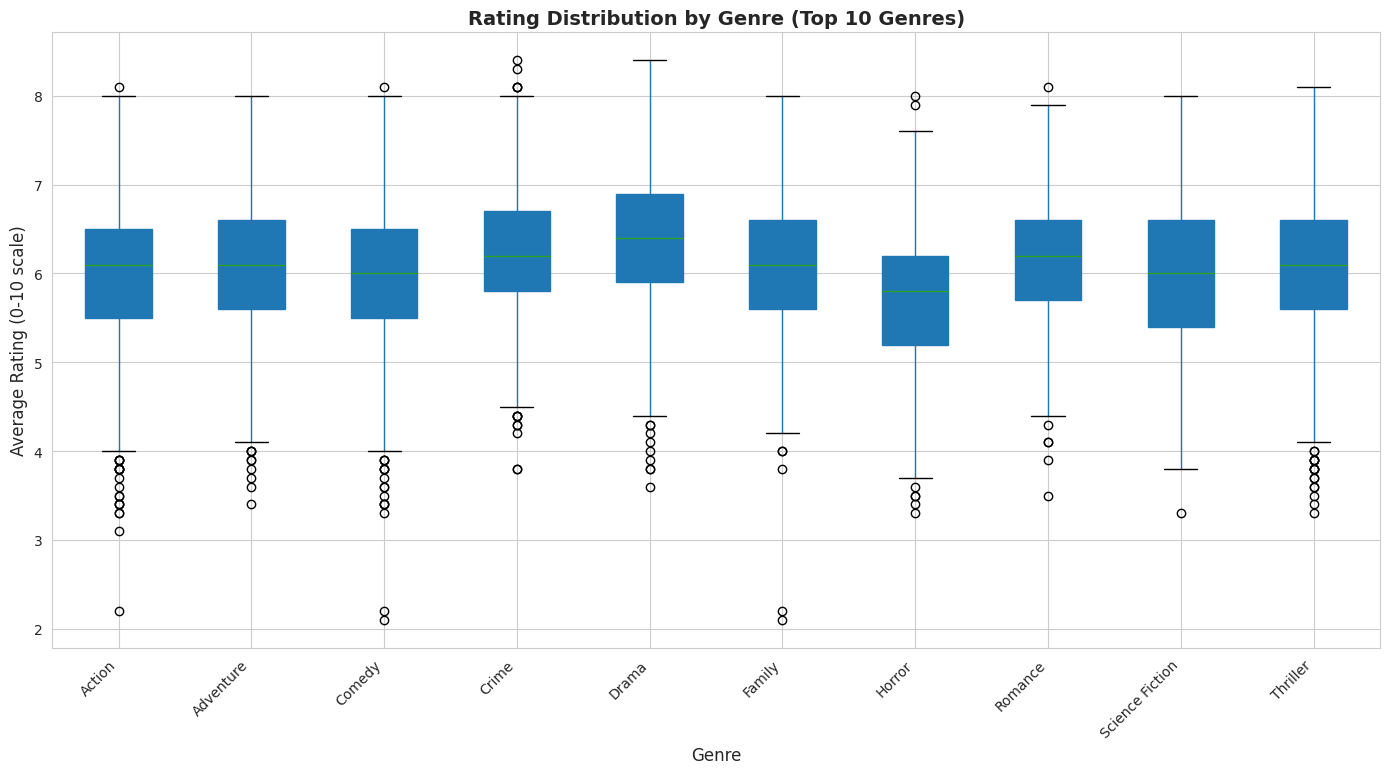

In [32]:
# Ratings by genre
print("\nMean Rating by Genre:")
genre_rating_stats = df_genres_exploded.groupby('genres')['vote_average'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
print(genre_rating_stats)

# Box plot for ratings
plt.figure(figsize=(14, 8))
df_top_genres.boxplot(column='vote_average', by='genres', figsize=(14, 8), patch_artist=True)
plt.title('Rating Distribution by Genre (Top 10 Genres)', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Rating (0-10 scale)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

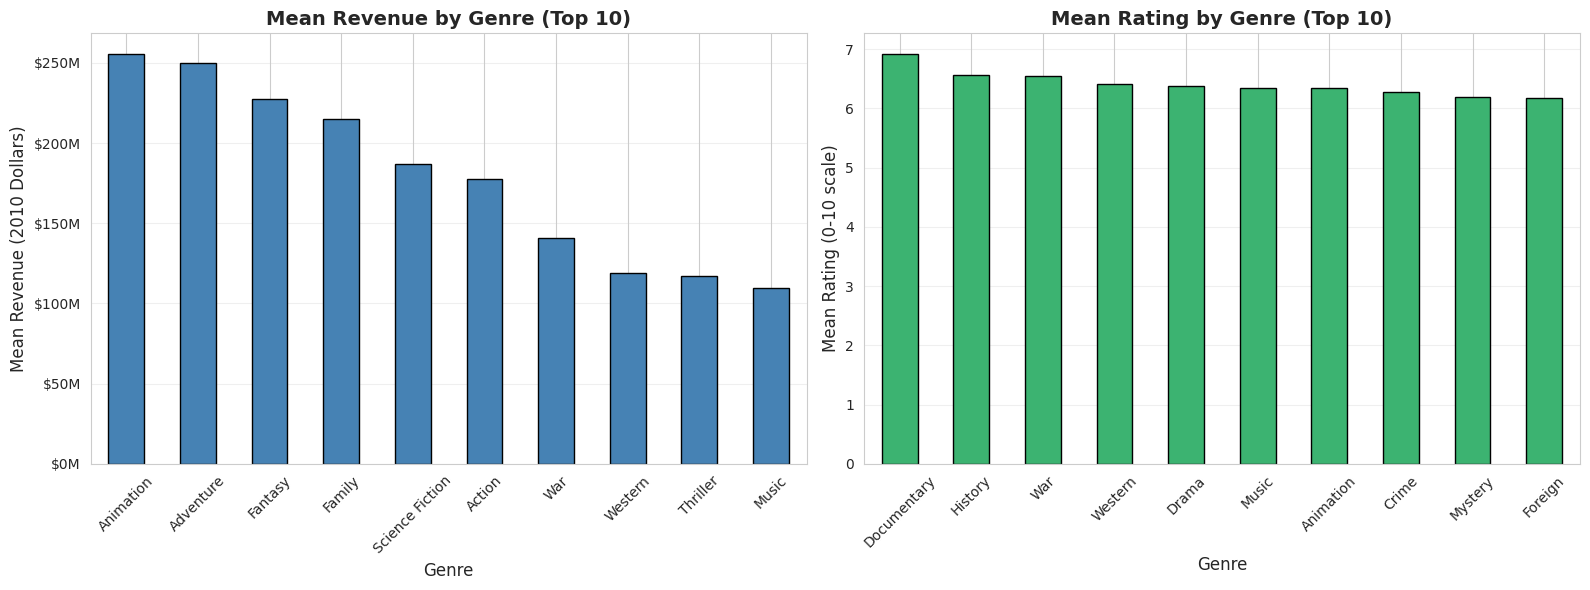

In [33]:
# Create side-by-side comparison of mean revenue and ratings
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Mean revenue by genre
genre_revenue_mean = df_genres_exploded.groupby('genres')['revenue_adj'].mean().sort_values(ascending=False).head(10)
genre_revenue_mean.plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black')
ax1.set_title('Mean Revenue by Genre (Top 10)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Genre', fontsize=12)
ax1.set_ylabel('Mean Revenue (2010 Dollars)', fontsize=12)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, p: f'${y/1e6:.0f}M'))
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Mean rating by genre
genre_rating_mean = df_genres_exploded.groupby('genres')['vote_average'].mean().sort_values(ascending=False).head(10)
genre_rating_mean.plot(kind='bar', ax=ax2, color='mediumseagreen', edgecolor='black')
ax2.set_title('Mean Rating by Genre (Top 10)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Genre', fontsize=12)
ax2.set_ylabel('Mean Rating (0-10 scale)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Key Findings

**Genre Popularity:**
- Drama (2,191 movies), Comedy (1,712), and Thriller (1,372) are the most common genres
- Action, Romance, and Adventure are also well-represented (800+ movies each)
- Niche genres like Documentary, Western, and Foreign have fewer entries
- Movies average 2.62 genres each, indicating significant genre overlap

**Commercial Performance by Genre:**
- **Family-friendly genres dominate revenue:** Animation (\\$256M mean), Adventure (\\$251M), Fantasy (\\$227M), and Family (\\$216M) lead in commercial performance
- **Prestige genres underperform commercially:** Documentary (\\$120M), Foreign (\\$112M), and Music (\\$109M) have the lowest mean revenues despite often receiving critical acclaim
- Science Fiction (\\$187M) and Action (\\$177M) show strong commercial performance, reflecting blockbuster appeal

**Critical Reception by Genre:**
- Documentary (6.92) and History (6.56) receive the highest ratings, followed by War (6.55) and Western (6.42)
- Drama (6.37) rates well critically despite being the most common genre
- Horror (5.71) receives the poorest ratings, though it maintains modest commercial viability
- Most mainstream genres (Action, Thriller, Comedy, Romance) cluster around 6.0-6.2 ratings

**Key Insight - The Prestige-Profit Divide:**
There's a striking disconnect between critical acclaim and commercial success. Documentary films receive the highest ratings (6.92) but earn relatively modest revenues (\\$120M mean), while Animation receives moderate ratings (6.35) but dominates the box office (\\$256M mean). This suggests audiences pay to be entertained rather than critically challenged, and that family-friendly spectacle drives revenue more effectively than artistic merit.

**Genre Strategy Implications:**
- Studios seeking maximum revenue should focus on Animation, Adventure, and Fantasy
- Films targeting critical recognition should consider Documentary, History, or War genres
- Action and Science Fiction offer a middle ground with strong commercial appeal and respectable ratings

### Question 4: What are the characteristics of the most successful movies?

We'll define "highly successful" movies as those in the top 10% by revenue. This gives us highly successful movies to compare against the remaining movies.

We'll examine how these movies differ across:
- Budget levels
- Ratings and vote counts
- Runtime
- Release trends over time
- Genre patterns

In [34]:
# Create analysis subset for Question 4
df_q4_success = df_cleaned[df_cleaned['revenue_adj'] > MIN_BUDGET_THRESHOLD].copy()

print(f"Q4 Analysis Dataset: {df_q4_success.shape[0]} movies")

# Define success thresholds
# Top 10% by revenue = "Highly Successful"
revenue_90th = df_q4_success['revenue_adj'].quantile(0.90)
print(f"\n90th percentile revenue: ${revenue_90th:,.2f}")

# Top 25% by revenue = "Successful"
revenue_75th = df_q4_success['revenue_adj'].quantile(0.75)
print(f"75th percentile revenue: ${revenue_75th:,.2f}")

# Create success categories
df_q4_success['success_category'] = pd.cut(
    df_q4_success['revenue_adj'],
    bins=[0, revenue_75th, revenue_90th, df_q4_success['revenue_adj'].max()],
    labels=['Moderate', 'Successful', 'Highly Successful'],
    include_lowest=True
)

print("\nSuccess Category Distribution:")
print(df_q4_success['success_category'].value_counts().sort_index())

# Create binary classification for simpler comparisons
df_q4_success['is_highly_successful'] = df_q4_success['revenue_adj'] >= revenue_90th

print(f"\nHighly Successful Movies (Top 10%): {df_q4_success['is_highly_successful'].sum()}")
print(f"Other Movies: {(~df_q4_success['is_highly_successful']).sum()}")

Q4 Analysis Dataset: 4667 movies

90th percentile revenue: $314,452,905.76
75th percentile revenue: $137,319,002.98

Success Category Distribution:
Moderate             3500
Successful            700
Highly Successful     467
Name: success_category, dtype: int64

Highly Successful Movies (Top 10%): 467
Other Movies: 4200


**1D Analysis - Budget**

First let's look at top genres in highly successful movies.


Top 10 Genres in Highly Successful Movies:
Adventure          224
Action             215
Comedy             146
Drama              136
Thriller           131
Family             115
Fantasy            109
Science Fiction    104
Animation           73
Romance             66
Name: genres, dtype: int64


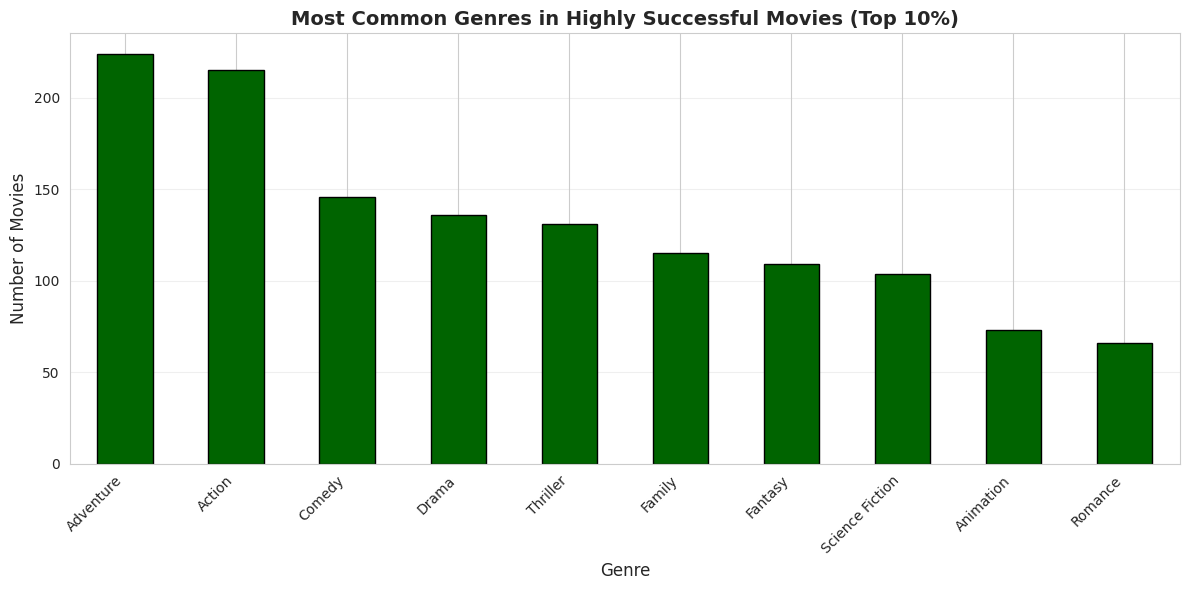

In [35]:
# Top genres in highly successful movies
df_q4_highly_successful = df_q4_success[df_q4_success['is_highly_successful']].copy()

# Split and explode genres
df_q4_highly_successful['genres'] = df_q4_highly_successful['genres'].str.split('|')
df_successful_genres = df_q4_highly_successful.explode('genres')
df_successful_genres['genres'] = df_successful_genres['genres'].str.strip()

successful_genre_counts = df_successful_genres['genres'].value_counts().head(10)

print("\nTop 10 Genres in Highly Successful Movies:")
print(successful_genre_counts)

plt.figure(figsize=(12, 6))
successful_genre_counts.plot(kind='bar', color='darkgreen', edgecolor='black')
plt.title('Most Common Genres in Highly Successful Movies (Top 10%)', fontsize=14, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**2D Analysis - Relationship Between Variables**

Now let's examine successful and unsuccessful movies in relation to budget, ratings, votes, and runtime. Along with some temporal trends.


Budget Comparison:

Highly Successful Movies:
count    4.670000e+02
mean     1.032715e+08
std      6.357836e+07
min      0.000000e+00
25%      5.122076e+07
50%      9.576865e+07
75%      1.512295e+08
max      3.683713e+08
Name: budget_adj, dtype: float64

Other Movies:
count    4.200000e+03
mean     2.889854e+07
std      3.390983e+07
min      0.000000e+00
25%      2.020816e+06
50%      1.847232e+07
75%      4.173876e+07
max      4.250000e+08
Name: budget_adj, dtype: float64


<Figure size 1000x600 with 0 Axes>

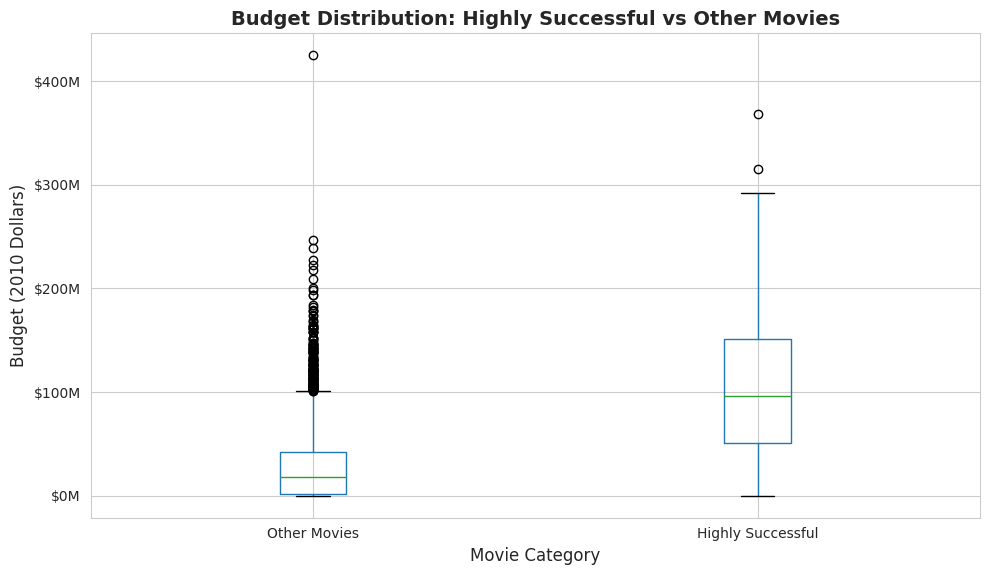

In [36]:
# Compare budget between successful and unsuccessful movies
print("\nBudget Comparison:")
print("\nHighly Successful Movies:")
print(df_q4_success[df_q4_success['is_highly_successful']]['budget_adj'].describe())
print("\nOther Movies:")
print(df_q4_success[~df_q4_success['is_highly_successful']]['budget_adj'].describe())

# Box plot comparison
plt.figure(figsize=(10, 6))
df_q4_success.boxplot(column='budget_adj', by='is_highly_successful', figsize=(10, 6))
plt.title('Budget Distribution: Highly Successful vs Other Movies', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Movie Category', fontsize=12)
plt.ylabel('Budget (2010 Dollars)', fontsize=12)
plt.xticks([1, 2], ['Other Movies', 'Highly Successful'])

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, p: f'${y/1e6:.0f}M'))

plt.tight_layout()
plt.show()


Ratings Comparison:

Highly Successful Movies:
count    467.000000
mean       6.635546
std        0.685644
min        4.400000
25%        6.100000
50%        6.600000
75%        7.100000
max        8.300000
Name: vote_average, dtype: float64

Other Movies:
count    4200.000000
mean        6.110143
std         0.786933
min         2.100000
25%         5.600000
50%         6.100000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

Vote Count Comparison (Audience Engagement):

Highly Successful Movies:
count     467.000000
mean     1817.130621
std      1650.860000
min        10.000000
25%       557.000000
50%      1314.000000
75%      2729.500000
max      9767.000000
Name: vote_count, dtype: float64

Other Movies:
count    4200.000000
mean      298.662381
std       459.568439
min        10.000000
25%        45.000000
50%       130.000000
75%       343.250000
max      5923.000000
Name: vote_count, dtype: float64


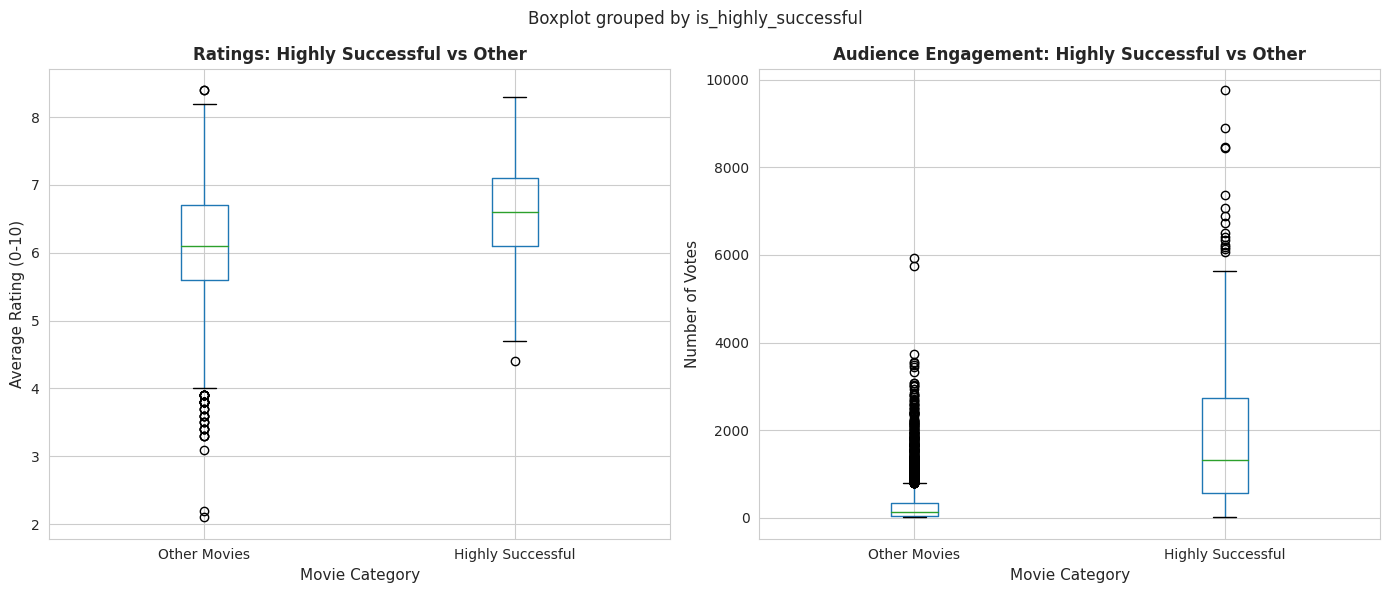

In [37]:
# Ratings comparison
print("\nRatings Comparison:")
print("\nHighly Successful Movies:")
print(df_q4_success[df_q4_success['is_highly_successful']]['vote_average'].describe())
print("\nOther Movies:")
print(df_q4_success[~df_q4_success['is_highly_successful']]['vote_average'].describe())

# Vote count comparison (engagement metric)
print("\nVote Count Comparison (Audience Engagement):")
print("\nHighly Successful Movies:")
print(df_q4_success[df_q4_success['is_highly_successful']]['vote_count'].describe())
print("\nOther Movies:")
print(df_q4_success[~df_q4_success['is_highly_successful']]['vote_count'].describe())

# Side-by-side box plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Ratings
df_q4_success.boxplot(column='vote_average', by='is_highly_successful', ax=ax1)
ax1.set_title('Ratings: Highly Successful vs Other', fontsize=12, fontweight='bold')
ax1.set_xlabel('Movie Category', fontsize=11)
ax1.set_ylabel('Average Rating (0-10)', fontsize=11)
ax1.set_xticklabels(['Other Movies', 'Highly Successful'])

# Vote count
df_q4_success.boxplot(column='vote_count', by='is_highly_successful', ax=ax2)
ax2.set_title('Audience Engagement: Highly Successful vs Other', fontsize=12, fontweight='bold')
ax2.set_xlabel('Movie Category', fontsize=11)
ax2.set_ylabel('Number of Votes', fontsize=11)
ax2.set_xticklabels(['Other Movies', 'Highly Successful'])

plt.tight_layout()
plt.show()


Runtime Comparison:

Highly Successful Movies:
count    467.000000
mean     120.976445
std       23.837556
min       78.000000
25%      103.000000
50%      119.000000
75%      135.000000
max      216.000000
Name: runtime, dtype: float64

Other Movies:
count    4200.000000
mean      106.719286
std        17.469601
min        62.000000
25%        95.000000
50%       104.000000
75%       116.000000
max       219.000000
Name: runtime, dtype: float64


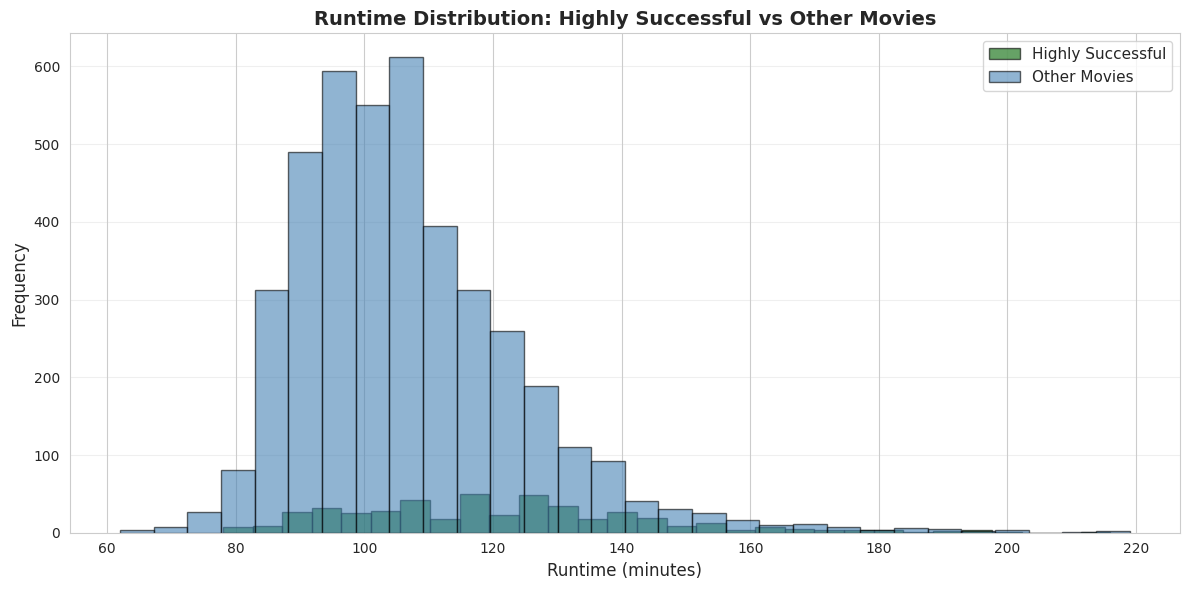

In [38]:
# Runtime comparison
print("\nRuntime Comparison:")
print("\nHighly Successful Movies:")
print(df_q4_success[df_q4_success['is_highly_successful']]['runtime'].describe())
print("\nOther Movies:")
print(df_q4_success[~df_q4_success['is_highly_successful']]['runtime'].describe())

# Histogram comparison
fig, ax = plt.subplots(figsize=(12, 6))

df_q4_success[df_q4_success['is_highly_successful']]['runtime'].hist(
    bins=30, alpha=0.6, label='Highly Successful', color='darkgreen', edgecolor='black', ax=ax
)
df_q4_success[~df_q4_success['is_highly_successful']]['runtime'].hist(
    bins=30, alpha=0.6, label='Other Movies', color='steelblue', edgecolor='black', ax=ax
)

plt.title('Runtime Distribution: Highly Successful vs Other Movies', fontsize=14, fontweight='bold')
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Now, let's get a little crazy and check out some temporal trends using `year`.

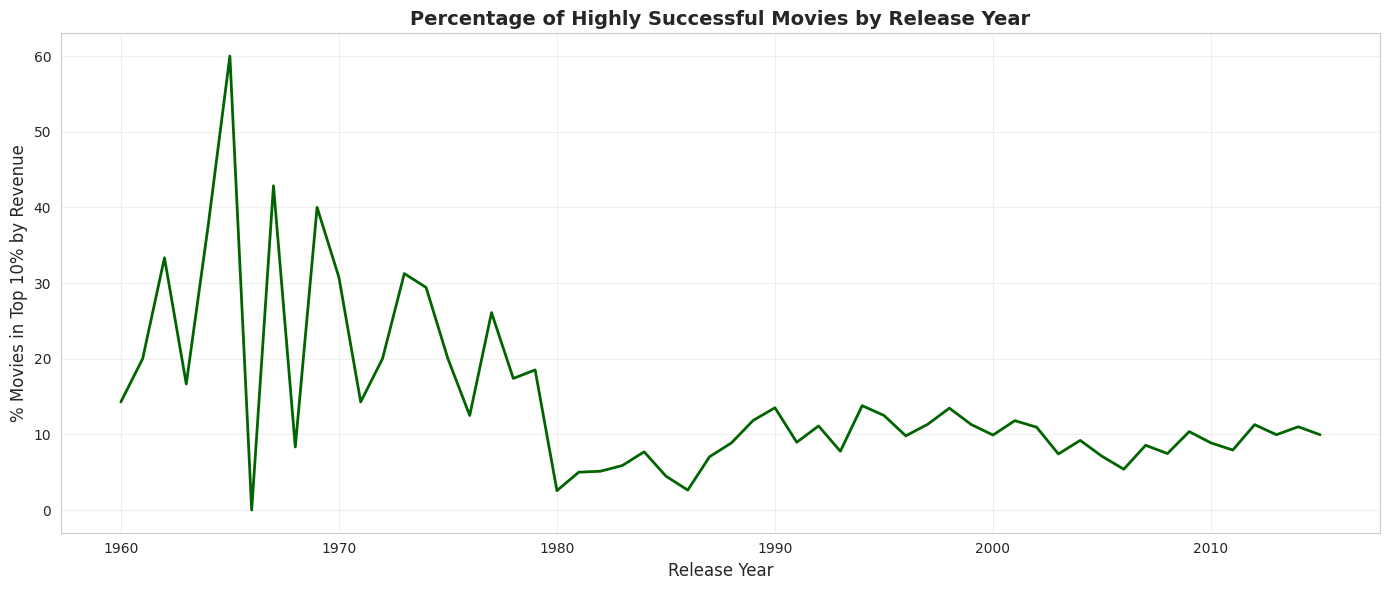

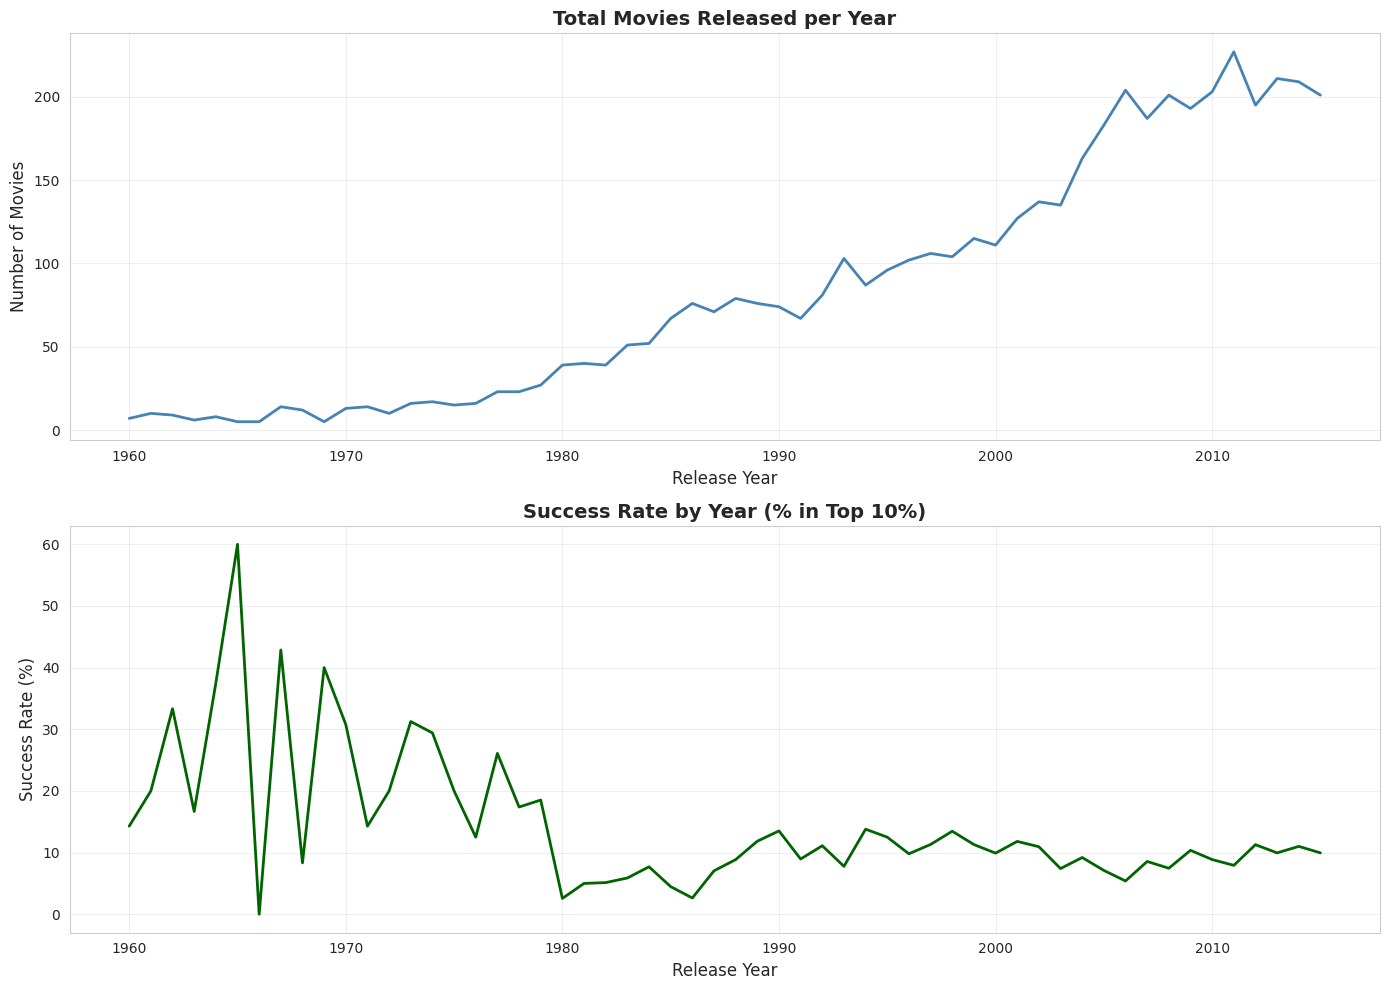

In [39]:
# Success rate by year
success_by_year = df_q4_success.groupby('release_year')['is_highly_successful'].agg(['sum', 'count'])
success_by_year['success_rate'] = (success_by_year['sum'] / success_by_year['count']) * 100

plt.figure(figsize=(14, 6))
plt.plot(success_by_year.index, success_by_year['success_rate'], linewidth=2, color='darkgreen')
plt.title('Percentage of Highly Successful Movies by Release Year', fontsize=14, fontweight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('% Movies in Top 10% by Revenue', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Count of movies per year
movies_per_year = df_q4_success.groupby('release_year').size()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Total movies per year
movies_per_year.plot(ax=ax1, linewidth=2, color='steelblue')
ax1.set_title('Total Movies Released per Year', fontsize=14, fontweight='bold')
ax1.set_xlabel('Release Year', fontsize=12)
ax1.set_ylabel('Number of Movies', fontsize=12)
ax1.grid(True, alpha=0.3)

# Success rate
success_by_year['success_rate'].plot(ax=ax2, linewidth=2, color='darkgreen')
ax2.set_title('Success Rate by Year (% in Top 10%)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Release Year', fontsize=12)
ax2.set_ylabel('Success Rate (%)', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Key Findings

**Budget - The Primary Differentiator:**
- Highly successful movies have dramatically higher budgets: mean \\$103M vs \\$29M for other movies
- The median successful movie budget is \\$96M (75th percentile), while typical movies spend just \\$18M (median)
- Success threshold: Movies need substantial financial backing - nearly all top-10% movies had budgets above \\$50M

**Critical Reception - Modest Impact:**
- Highly successful movies rate slightly higher (6.64 mean) vs other movies (6.11 mean)
- However, the difference is modest - only 0.5 points on a 10-point scale
- This reinforces our Q2 finding: ratings weakly predict commercial success

**Audience Engagement - The Hidden Factor:**
- **Vote count shows the starkest difference:** Highly successful movies average 1,817 votes vs just 298 for other movies
- This 6x difference suggests that blockbusters generate massive audience engagement and cultural conversation
- High engagement likely indicates effective marketing and word-of-mouth amplification

**Runtime - Slightly Longer:**
- Successful movies average 121 minutes vs 100 minutes for other movies
- The runtime distributions largely overlap, suggesting length alone doesn't determine success
- However, blockbusters can afford longer runtimes because audiences are more willing to invest time in major releases

**Temporal Trends - The Golden Age Effect:**
- 1960s-1970s show wild success rate volatility (0-60%), likely due to small sample sizes
- Success rates stabilized around 10% from 1980 onward (by definition of our top 10% threshold)
- Total movie production has increased dramatically: from ~10 movies/year (1960s) to ~200 movies/year (2010s)
- More competition means it's harder to stand out, even with larger budgets

**Genre Patterns - Blockbuster Formula:**
- Adventure (224 movies) and Action (215) dominate the top 10%, confirming Q3's finding that spectacle sells
- Comedy (145), Drama (136), and Thriller (131) are also common, showing genre diversity
- Family (115), Fantasy (109), and Science Fiction (104) round out the top genres
- This aligns with Q3: family-friendly spectacle genres (Adventure, Animation, Fantasy) lead in both frequency and revenue

**The Success Formula:**
To maximize chances of box office success:
1. **Invest heavily in production** (\\$100M+ budget)
2. **Choose high-spectacle genres** (Adventure, Action, Sci-Fi, Fantasy)
3. **Generate pre-release buzz** (aim for high audience engagement/votes)
4. **Maintain reasonable quality** (6.5+ rating is sufficient)
5. **Allow adequate runtime** (110-130 minutes for proper storytelling)

**Critical Insight:** Money talks. Budget is the strongest predictor of success, far more than critical acclaim. The film industry operates on a "spend money to make money" principle, where large investments in production, marketing, and star power create self-fulfilling prophecies of commercial success.

<a id='conclusions'></a>
## Conclusions

This analysis explored the TMDb movie dataset to understand what factors are associated with a movie's financial success and audience reception. Through systematic analysis of 4,667 movies with revenue data, we examined relationships between budget, revenue, ratings, genres, and other characteristics.

### Summary of Findings

**Question 1: Budget and Revenue Relationship**

We found a moderate positive correlation (r = 0.567) between budget and revenue. Higher budgets tend to generate higher revenues, but the relationship shows substantial scatter. Many movies with similar budgets achieve vastly different revenue outcomes, indicating that budget alone doesn't guarantee success. The median theatrical film budget is \\$30.4M, while the median revenue is \\$64.4M, both showing highly right-skewed distributions dominated by expensive blockbusters.

**Question 2: Critical Reception and Commercial Success**

Contrary to what one might expect, critical reception shows only a weak correlation (r = 0.240) with commercial success. Movies rated 6.0 can earn anywhere from under \\$1M to over \\$2.5B. This weak relationship suggests that audiences don't primarily make viewing decisions based on critical reviews. Factors like marketing, star power, genre appeal, and release timing likely play much larger roles than critical acclaim in determining box office performance.

**Question 3: Genre Performance**

Genre analysis revealed a striking divide between prestige and profit:
- **Commercial leaders:** Animation (\\$256M mean revenue), Adventure (\\$251M), and Fantasy (\\$227M) dominate box office performance
- **Critical favorites:** Documentary (6.92 mean rating), History (6.56), and War (6.55) receive the highest ratings but earn modest revenues
- Drama is the most common genre (2,191 movies), followed by Comedy (1,712) and Thriller (1,372)

The data shows that family-friendly spectacle drives revenue more effectively than artistic merit.

**Question 4: Characteristics of Successful Movies**

Analysis of the top 10% of movies by revenue revealed that highly successful movies share these characteristics:
- **Significantly higher budgets:** \\$103M mean vs \\$29M for other movies
- **Slightly higher ratings:** 6.64 vs 6.11 (modest 0.5-point difference)
- **Dramatically higher audience engagement:** 1,817 votes vs 298 votes (6x difference)
- **Longer runtimes:** 121 minutes vs 100 minutes on average
- **Favor spectacle genres:** Adventure (224 movies) and Action (215) dominate the top 10%

The strongest predictor of commercial success is budget, followed by audience engagement (vote counts), with critical reception being a relatively weak factor.

### Answering the Primary Question

**"What factors are associated with a movie's financial success and audience reception?"**

Our analysis demonstrates that:

1. **Budget is strongly associated with revenue** (r = 0.567) - investing more in production correlates with earning more at the box office
2. **Genre matters significantly** - Adventure, Animation, and Fantasy films achieve the highest mean revenues
3. **Critical reception is weakly associated with commercial success** (r = 0.240) - high ratings don't guarantee high revenue
4. **Audience engagement is a key differentiator** - successful movies generate 6x more votes/discussion than typical films
5. **The film industry favors spectacle over substance** - family-friendly blockbusters outperform critically acclaimed dramas commercially

It's important to note that these are **associations, not causal relationships**. We cannot conclude that increasing budget *causes* higher revenue, as many other factors (marketing spend, star power, release strategy, competition) influence outcomes. The correlations we observe likely reflect complex interactions between multiple variables.

### Limitations

This analysis has several important limitations that should be considered when interpreting the findings:

**1. Data Quality Issues**

The dataset contained significant data quality problems:
- Budget data had inconsistent units (some entries like "The Hunt for Red October" listed as \\$50K when actual budget was \\$30M)
- We removed 33 movies with budgets under $50K due to clear data errors
- 5,035 movies (41.6%) had zero values for both budget columns, limiting our budget-revenue analysis to 3,812 movies
- The data comes from crowd-sourced TMDb entries, which may contain errors or inconsistencies

**2. Missing Variables**

Critical factors that likely influence success were not available in the dataset:
- **Marketing budgets:** Often equal to or exceed production budgets for blockbusters
- **Star power:** A-list actors command premium salaries and drive ticket sales
- **Studio backing:** Major studio releases receive better distribution and promotion
- **Release strategy:** Summer blockbusters vs Oscar-season releases face different competition
- **International markets:** Revenue data may not fully capture global box office performance
- **Streaming/home video:** Analysis focused on theatrical revenue only

**3. Correlation vs Causation**

All findings represent associations, not causal relationships. For example:
- Higher budgets correlate with higher revenues, but this doesn't mean simply spending more guarantees success
- The relationship likely reflects that studios invest heavily in projects they believe will succeed (reverse causation)
- Confounding variables (marketing, stars, timing) weren't controlled for in this analysis

**4. Survivorship Bias**

The dataset may over-represent successful films and under-represent failures, particularly for older movies that haven't been extensively documented on TMDb.

**5. Genre Overlap**

Movies with multiple genres (averaging 2.62 genres per film) were counted in each genre category, meaning genre statistics don't represent mutually exclusive groups. A single blockbuster could inflate multiple genre categories simultaneously.

**6. Time Period Limitations**

The dataset spans 1960-2015 but with uneven representation. Earlier decades have fewer entries and higher data quality issues, limiting our ability to draw conclusions about historical trends.

### Suggestions for Additional Research

To build on these findings, future analyses could:

1. **Include marketing budgets** to better understand total investment vs return
2. **Analyze profitability ratios** (revenue/budget) rather than just absolute revenue to identify the most efficient investments
3. **Incorporate star power metrics** (actor salaries, social media following, previous box office performance)
4. **Study release timing effects** (seasonal patterns, competition, day-of-week impacts)
5. **Compare theatrical vs streaming performance** in the post-2015 era as distribution models evolve
6. **Conduct genre-specific deep dives** to understand what makes successful Horror films vs successful Comedies
7. **Analyze the impact of franchises and sequels** vs original content
8. **Study international vs domestic revenue patterns** to understand global market dynamics
8. **Investigate the role of critical reviews from specific sources** (Metacritic, Rotten Tomatoes) with more granular data
9. **Examine whether the budget-revenue relationship has changed over time** as production costs and ticket prices have evolved

### Final Thoughts

This analysis demonstrates that commercial success in filmmaking is primarily driven by financial investment and genre selection, not critical acclaim. The "build it big and they will come" approach dominates Hollywood, where $100M+ budgets targeting family-friendly spectacle genres offer the best odds of box office success. However, the substantial variation in outcomes even among similarly-budgeted films reminds us that moviemaking remains part art, part science, and part luck - no formula guarantees success.

For audiences and critics, the findings suggest a disconnect between artistic merit and commercial performance. The films that earn the most aren't necessarily the best-rated, and the highest-rated films often earn relatively modest revenues. This raises questions about whether the current blockbuster-driven industry serves artistic or cultural goals, or simply commercial ones.

In [42]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 19 image(s).
[NbConvertApp] Writing 1894153 bytes to Investigate_a_Dataset.html
